In [5]:
import jax.numpy as jnp
from integrals import *
import matplotlib.pyplot as plt

In [6]:
@jax.jit
def igv(t, a, b, z):

    x = (a * jnp.cos(t))**2 + (z + b * jnp.sin(t))**2
    return a * (b + jnp.sin(t) * z) * (
        1 - (1 - x) ** 1.5
    ) / (3 * x)
    
def igt(t, a, b, z):

    num = a * (b + t * z) * (1 - (1 - a * a * (1 - t * t) - (b * t + z)**2)**1.5)
    den = 3 * jnp.sqrt(1 - t * t) * (a * a * (1 - t * t) + (b * t + z)**2)
    return num / den 

In [7]:
quad(lambda x: (1-x)**3, 0.1, 0.2)[0] - quad(lambda y: -1 * y**3, 1-0.1, 1-0.2)[0]

-6.938893903907228e-18

In [8]:
from scipy.integrate import quad

a = 0.1
b = 0.05
z = 0.6

v1 = -jnp.pi / 2
v2 = jnp.pi / 2

t1 = jnp.sin(v1)
t2 = jnp.sin(v2)

int_igv = quad(igv, v1, v2, args=(a, b, z))
int_igt = quad(igt, t1, t2, args=(a, b, z))

print(int_igv)
print(int_igt)

(0.006266075866827483, 6.030667271169308e-16)
(0.006266075866827175, 1.4422790187845758e-08)


/var/folders/dc/b802gvz91_q_5p71n099w8d40000gn/T/ipykernel_18289/2694532819.py:14: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  int_igt = quad(igt, t1, t2, args=(a, b, z))


In [9]:
arc_complete(a, b, z)

Array(0.00626608, dtype=float64)

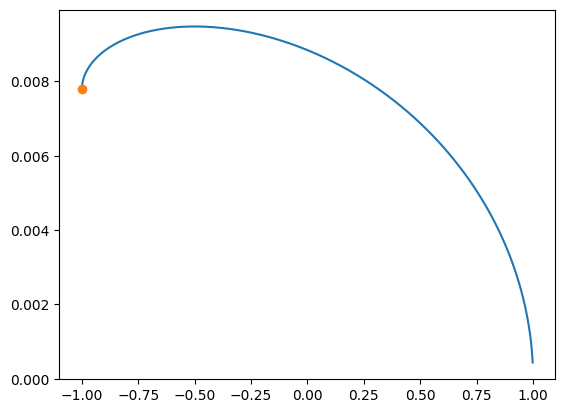

In [39]:
a = 0.1
b = 0.05
z = 0.1
x = jnp.linspace(-0.99999, 0.99999, 1000)
plt.plot(x, arc(a, b, z, x, 0.99999))
plt.plot(-1, arc_complete(a, b, z), 'o')

In [ ]:
b1 = 1
b4 = -1

x = 0.0
y = 1.0

a = 0.1
b = 0.05
z = 0.6
c = (a + b) * (a - b)

f = (1 - a * a - z * z) / (c * c)
g = -2 * b * z / (c * c)

In [ ]:
#def int23(y, x, f, g, b1, b4):

x1 = jnp.sqrt(1 + b1 * x)
x4 = jnp.sqrt(1 + b4 * x)

y1 = jnp.sqrt(1 + b1 * y)
y4 = jnp.sqrt(1 + b4 * y)

xi = jnp.sqrt(f + g * x + x * x)
eta = jnp.sqrt(f + g * y + y * y)

del2 = 4 * f - g * g
bet4 = g * b4 - 2
bet1 = g * b1 - 2

c1sq = 2 * f - 2 * g * b1 + 2
c4sq = 2 * f - 2 * g * b4 + 2
c14sq = -2 * f + 2
c1c4 = jnp.sqrt(c1sq * c4sq)

d14 = b4 - b1
r14 = -d14

A111m1 = x1 * xi / x4 - y1 * eta / y4
A1111 = x1 * xi * x4 - y1 * eta * y4

c3 = (r14 * r14 - c1sq + del2 + c4sq) / 8
s = (r14 + bet4 / b4) / 8
c2 = c4sq / (2 * b4)
c1 = c1sq / (16 * b1) * (1 / b1 + 1 / b4 - g)

M2 = (x1 * y4 + y1 * x4)**2 * (
    2 * xi * eta + 2 * f + g * (x + y) + 2 * x * y
) / (x - y)**2
    
Lp2 = M2 + c14sq + c1c4
Lm2 = M2 + c14sq - c1c4
U = (x1 * x4 * eta + y1 * y4 * xi) / (x - y)
U2 = U * U
W2 = U2 + 0.5 * c1sq
Q2 = W2 / (x1 * y1)**2
P2 = Q2 - 1
rho = d14 * (bet1 - jnp.sqrt(2 * c1sq)) / b1
erf = rf(M2, Lm2, Lp2)
erj = rj_posp(M2, Lm2, Lp2, M2 + rho)
erd = rd(M2, Lm2, Lp2)
rcuw = rc_posy(U2, W2)
rcpq = rc_posy(P2, Q2)

I1 = 4 * erf
I2 = (
    (2 / 3) * jnp.sqrt(c1sq / c4sq)
    * (4 * (c14sq + c1c4) * erd 
        - 6 * erf + 3 / U) 
    + 2 * x1 * y1 / (x4 * y4 * U)
)
I3p = (
    jnp.sqrt(2 * c1sq / 9) 
    * (4 * rho * erj 
        - 6 * erf + 3 * rcuw) 
    + 2 * rcpq
)

integral = (
    c3 * I3p 
    + s * (c2 * I2 + 2 * A111m1) 
    + c1 * I1 + A1111 / (2 * b4)
)

In [ ]:
integral

In [ ]:
@jax.jit
def ig(t, a, b, z):

    x = (a * jnp.cos(t))**2 + (z + b * jnp.sin(t))**2
    return a * (b + jnp.sin(t) * z) * (
        1 - (1 - x) ** 1.5
    ) / (3 * x)
    
def igt(t, a, b, z):

    num = a * (b + t * z) * (1 - (1 - a * a * (1 - t * t) - (b * t + z)**2)**1.5)
    den = 3 * jnp.sqrt(1 - t * t) * (a * a * (1 - t * t) + (b * t + z)**2)
    return num / den 

In [ ]:
a = 0.5
b = 0.4
z = 0.65

t = jnp.linspace(-1, 1, 1000)
plt.plot(t, igt(t, a, b, z))

In [ ]:
import matplotlib.pyplot as plt
t = jnp.linspace(-2 * jnp.pi, 2 * jnp.pi, 100)
plt.plot(t, ig(t, a, b, z))

In [35]:
@jax.jit
def complete_integral2(a, b, z):
    n = 5
    ni = jnp.arange(n) + 1
    twopi_n = 2 * jnp.pi / n
    return twopi_n * jnp.sum(igv(twopi_n * ni, a, b, z)) / 2

In [36]:
print(complete_integral2(a, b, z))

0.006266075866827151


In [ ]:
quad(igv, -jnp.pi / 2, jnp.pi / 2, args=(a, b, z))

In [ ]:
from integrals import *

In [ ]:
y = jnp.array([-0.9] * 1)
%timeit arc(a, b, z, y, 0.2)

In [ ]:
#t = jnp.linspace(
t = jnp.linspace(-3.5, 2.2, 1000)
plt.plot(t, ig(t, 0.8, 0.5, 0.8))